In [1]:
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
iris_data = pd.read_csv('iris.data')
iris_data


,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
colums_name = ['Sepal length', 'Sepal width',
               'Petal length', 'Petal width', 'class']
iris_data.columns = colums_name
iris_data


,Sepal length,Sepal width,Petal length,Petal width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
iris_data.isnull().sum()


Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
class           0
dtype: int64

In [5]:
iris_data.value_counts('class')


class
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
dtype: int64

<AxesSubplot: xlabel='class', ylabel='count'>

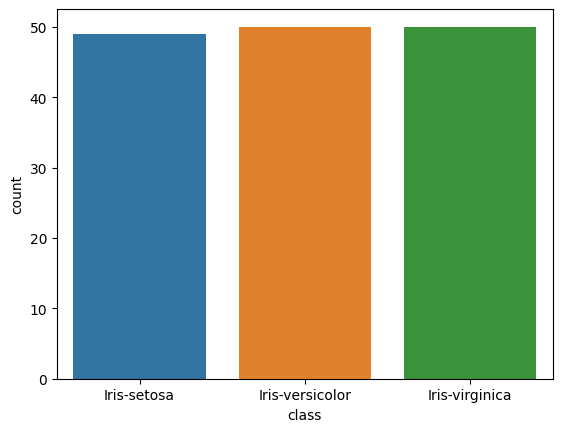

In [6]:
sns.countplot(x='class', data=iris_data)


[Text(0.5, 1.0, 'Sepal Length and Sepal Width')]

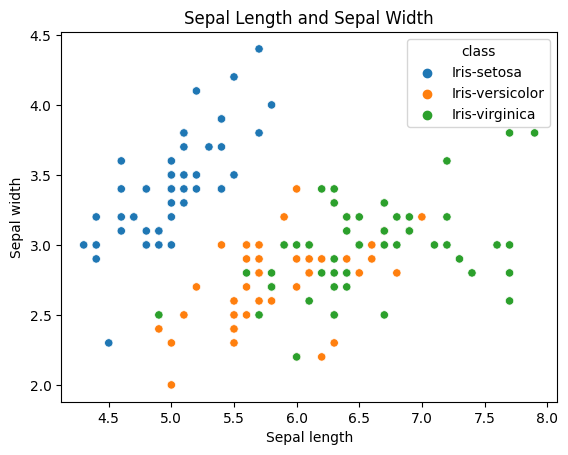

In [7]:
fig1 = sns.scatterplot(x='Sepal length', y="Sepal width",
                       hue="class", data=iris_data)
fig1.set(title="Sepal Length and Sepal Width")


[Text(0.5, 1.0, 'Petal length and Petal width')]

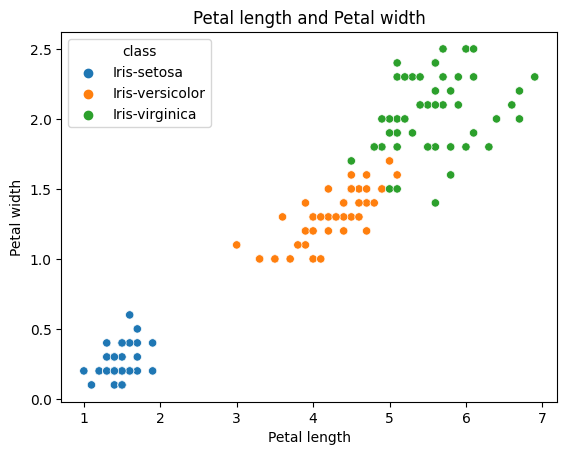

In [8]:
fig2 = sns.scatterplot(x='Petal length', y="Petal width",
                       hue="class", data=iris_data)
fig2.set(title="Petal length and Petal width")


In [9]:
features = iris_data.iloc[:, 0:4]
label = iris_data.iloc[:, 4]
print("Features : ")
print(features)
print("Label : ")
print(label)


Features : 
     Sepal length  Sepal width  Petal length  Petal width
0             4.9          3.0           1.4          0.2
1             4.7          3.2           1.3          0.2
2             4.6          3.1           1.5          0.2
3             5.0          3.6           1.4          0.2
4             5.4          3.9           1.7          0.4
..            ...          ...           ...          ...
144           6.7          3.0           5.2          2.3
145           6.3          2.5           5.0          1.9
146           6.5          3.0           5.2          2.0
147           6.2          3.4           5.4          2.3
148           5.9          3.0           5.1          1.8

[149 rows x 4 columns]
Label : 
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
144    Iris-virginica
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
Name: class, Leng

In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    features, label, test_size=0.2, random_state=0)
print('Jumlah data train', x_train.shape[0])
print('Jumlah data test', y_test.shape[0])


Jumlah data train 119
Jumlah data test 30


In [11]:

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6, weights="distance")

knn.fit(x_train, y_train)

train_acc = knn.score(x_train, y_train)
print("The accuracy of KNN classifier on training data is : {:.3f}".format(
    train_acc))


The accuracy of KNN classifier on training data is : 1.000


In [12]:
knn_test_acc = knn.score(x_test, y_test)

print("The accuracy of KNN classifier on test data is : {:.3f}".format(
    knn_test_acc))


The accuracy of KNN classifier on test data is : 0.967


Text(0.5, 1.0, 'Confusion Matrix')

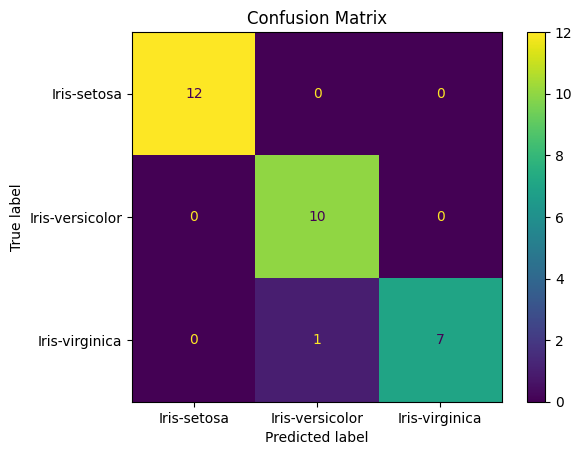

In [13]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)
disp.ax_.set_title("Confusion Matrix")


In [14]:
from subprocess import check_output
from sklearn import tree
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


In [15]:
data = pd.read_csv('iris.data')
features = data.iloc[:, 0:4]
label = data.iloc[:, 4]


In [16]:
from sklearn.neighbors import KNeighborsClassifier

n_range = list(range(1, 10))
weight_list = ["uniform", "distance"]
param_grid = {"n_neighbors": n_range, "weights": weight_list}
grid = GridSearchCV(estimator=KNeighborsClassifier(),
                    param_grid=param_grid, cv=3, scoring='accuracy', refit=True)

knn_model = make_pipeline(preprocessing.StandardScaler(), grid)

knn_model.fit(features, label)
print("Accuracy of the tuned model : %.4f" % grid.best_score_)
print(grid.best_params_)


Accuracy of the tuned model : 0.9665
{'n_neighbors': 6, 'weights': 'distance'}


In [17]:
import pickle

with open('knn_model.pickle', 'wb') as f:
    pickle.dump(knn_model, f)


In [18]:
with open('knn_model.pickle', 'rb') as f:
    model = pickle.load(f)

new_data = [6.5, 3.5, 5.5, 2.0]
x = np.array([new_data])
prediction = model.predict(x)
print("Prediction of Species : {}".format(prediction))

# Finally test the prediction against the model


Prediction of Species : ['Iris-virginica']


C:\Users\Asus\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
